In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import json

In [2]:
ckpts10 = [int(_) for _ in ["220", "440", "660", "880", "1100"]]


In [3]:
test_accs_rand = []

for ckpt in ckpts10:
    name = "math_aug3_rand2646_total2646_epochs10"
    test_accs = (np.load("../ckpts/"+name+"/checkpoint-"+str(ckpt)+ "/test_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    test_accs_rand.append(test_accs.mean())


test_accs_rand = np.array(test_accs_rand)

0.04184
0.08312
0.11292
0.13448
0.1632


In [4]:
test_accs_rand_unmemorized = []

ckpts10_2 = [int(_) for _ in [ "440", "880", "1320", "1760", "2200"]]

for ckpt in ckpts10_2:
    name = "math_aug3_rand_50_unmemorized_eq_50_total5292_epochs10"
    test_accs = (np.load("../ckpts/"+name+"/checkpoint-"+str(ckpt)+ "/test_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    test_accs_rand_unmemorized.append(test_accs.mean())


test_accs_rand_unmemorized = np.array(test_accs_rand_unmemorized)

0.06788
0.10448
0.12352
0.1548
0.17124


In [5]:
ckpts20 = [int(_) for _ in ["220", "440", "660", "880", "1100", "1320", "1540", "1760", "1980", "2200"]]

test_accs_rand20 = []

for ckpt in ckpts20:
    name = "math_aug3_rand2646_total2646_epochs20"
    test_accs = (np.load("../ckpts/"+name+"/checkpoint-"+str(ckpt)+ "/test_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    test_accs_rand20.append(test_accs.mean())


test_accs_rand20 = np.array(test_accs_rand20)

0.03856
0.06436
0.08876
0.10604
0.11772
0.13228
0.14232
0.1492
0.15552
0.16024


In [6]:
test_accs_0 = []

for ckpt in ckpts10:
    name = "math_aug3_unmemorized_eq_0_total2646_epochs10"
    test_accs = (np.load("../ckpts/"+name+"/checkpoint-"+str(ckpt)+ "/test_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    test_accs_0.append(test_accs.mean())


test_accs_0 = np.array(test_accs_0)

0.04044
0.04836
0.05592
0.06212
0.06364


Text(0.5, 1.0, 'MATH 2646 examples')

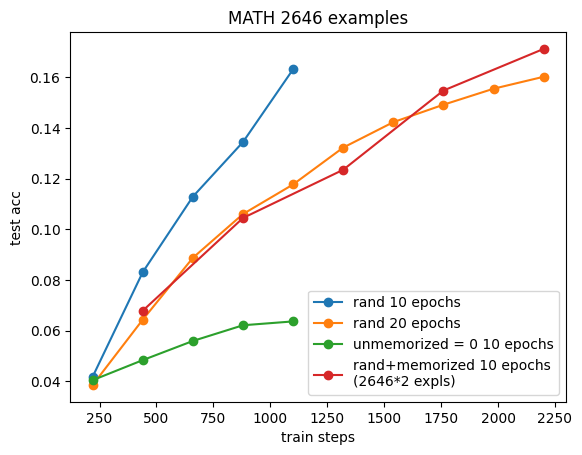

In [7]:
plt.plot(ckpts10, test_accs_rand, "o-", label = "rand 10 epochs")
plt.plot(ckpts20, test_accs_rand20, "o-", label = "rand 20 epochs")
plt.plot(ckpts10, test_accs_0, "o-", label = "unmemorized = 0 10 epochs")
plt.plot(ckpts10_2, test_accs_rand_unmemorized, "o-", label = "rand+memorized 10 epochs\n(2646*2 expls)")

plt.legend()

plt.xlabel("train steps")
plt.ylabel("test acc")
plt.title("MATH 2646 examples")


In [8]:
with open('../data/MATH_aug/AugMATH_part1.jsonl', 'r') as json_file:
    json_list = list(json_file)

with open('../data/MATH_aug/AugMATH_part2.jsonl', 'r') as json_file:
    json_list += list(json_file)

train_questions = []
train_answers = []
for json_str in json_list:
    result = json.loads(json_str)
    train_questions.append(result["query"])
    train_answers.append(result["response"])
    
train_questions = np.array(train_questions)
train_answers = np.array(train_answers)

In [9]:
name = "math_aug3_rand2646_total2646_epochs10"
subsample_idxs_rand = np.load("../ckpts/"+name+"/subsample_idxs.npy")

name = "math_aug3_unmemorized_eq_0_total2646_epochs10"
subsample_idxs_0 = np.load("../ckpts/"+name+"/subsample_idxs.npy")

In [10]:
num_memorized_all = []
num_correct_different_all = []
num_incorrect_all = []

# ckpts = ["110", "220", "331", "441", "550"]
ckpts = ["220", "440", "660", "880", "1100"]

for ckpt in ckpts:
    name = "math_aug3_rand2646_total2646_epochs10"
    # name = "math_aug3_unmemorized_eq_0_total2646_epochs10"
    train_correct = (np.load("../ckpts/"+name+"/checkpoint-"+ckpt+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    train_samples = (np.load("../ckpts/"+name+"/checkpoint-"+ckpt+ "/train_aug_subsample_answers5_seed2.npy"))

    num_memorized_ckpt = []
    num_correct_different_ckpt = []
    num_incorrect_ckpt = []

    for input_idx in range(len(train_correct)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(5):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs_rand[input_idx]].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1 
        num_memorized_ckpt.append(num_memorized)
        num_correct_different_ckpt.append(num_correct_different)
        num_incorrect_ckpt.append(num_incorrect)
    
    num_memorized_all.append(num_memorized_ckpt)
    num_correct_different_all.append(num_correct_different_ckpt)
    num_incorrect_all.append(num_incorrect_ckpt)
    
num_memorized_all = np.array(num_memorized_all)
num_correct_different_all = np.array(num_correct_different_all)
num_incorrect_all = np.array(num_incorrect_all)

In [11]:
num_memorized_all2 = []
num_correct_different_all2 = []
num_incorrect_all2 = []

# ckpts = ["110", "220", "331", "441", "550"]
ckpts = ["220", "440", "660", "880", "1100"]

for ckpt in ckpts:
    # name = "math_aug3_rand2646_total2646_epochs10"
    name = "math_aug3_unmemorized_eq_0_total2646_epochs10"
    train_correct = (np.load("../ckpts/"+name+"/checkpoint-"+ckpt+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    train_samples = (np.load("../ckpts/"+name+"/checkpoint-"+ckpt+ "/train_aug_subsample_answers5_seed2.npy"))

    num_memorized_ckpt = []
    num_correct_different_ckpt = []
    num_incorrect_ckpt = []

    for input_idx in range(len(train_correct)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(5):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs_0[input_idx]].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1 
        num_memorized_ckpt.append(num_memorized)
        num_correct_different_ckpt.append(num_correct_different)
        num_incorrect_ckpt.append(num_incorrect)
    
    num_memorized_all2.append(num_memorized_ckpt)
    num_correct_different_all2.append(num_correct_different_ckpt)
    num_incorrect_all2.append(num_incorrect_ckpt)
    
num_memorized_all2 = np.array(num_memorized_all2)
num_correct_different_all2 = np.array(num_correct_different_all2)
num_incorrect_all2 = np.array(num_incorrect_all2)

In [12]:
# test_accs_rand_unmemorized = []

# ckpts10_2 = [int(_) for _ in [ "440", "880", "1320", "1760", "2200"]]

# for ckpt in ckpts10_2:
#     name = "math_aug3_rand_50_unmemorized_eq_50_total5292_epochs10"
#     test_accs = (np.load("../ckpts/"+name+"/checkpoint-"+str(ckpt)+ "/test_answer_types5_seed2.npy")==0)
#     print(test_accs.mean())
#     test_accs_rand_unmemorized.append(test_accs.mean())


# test_accs_rand_unmemorized = np.array(test_accs_rand_unmemorized)


name = "math_aug3_rand_50_unmemorized_eq_50_total5292_epochs10"
subsample_idxs_rand_unmemorized = np.load("../ckpts/"+name+"/subsample_idxs.npy")


num_memorized_all_rand_unmemorized = []
num_correct_different_all_rand_unmemorized = []
num_incorrect_all_rand_unmemorized = []

# ckpts = ["110", "220", "331", "441", "550"]
ckpts = [ "440", "880", "1320", "1760", "2200"]

for ckpt in ckpts:
    # name = "math_aug3_rand2646_total2646_epochs10"
    name = "math_aug3_rand_50_unmemorized_eq_50_total5292_epochs10"
    train_correct = (np.load("../ckpts/"+name+"/checkpoint-"+ckpt+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    train_samples = (np.load("../ckpts/"+name+"/checkpoint-"+ckpt+ "/train_aug_subsample_answers5_seed2.npy"))

    num_memorized_ckpt = []
    num_correct_different_ckpt = []
    num_incorrect_ckpt = []

    for input_idx in range(len(train_correct)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(5):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs_rand_unmemorized[input_idx]].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1 
        
        assert(num_memorized+num_correct_different+num_incorrect==5)
        num_memorized_ckpt.append(num_memorized)
        num_correct_different_ckpt.append(num_correct_different)
        num_incorrect_ckpt.append(num_incorrect)
    
    num_memorized_all_rand_unmemorized.append(num_memorized_ckpt)
    num_correct_different_all_rand_unmemorized.append(num_correct_different_ckpt)
    num_incorrect_all_rand_unmemorized.append(num_incorrect_ckpt)
    
num_memorized_all_rand_unmemorized = np.array(num_memorized_all_rand_unmemorized)
num_correct_different_all_rand_unmemorized = np.array(num_correct_different_all_rand_unmemorized)
num_incorrect_all_rand_unmemorized = np.array(num_incorrect_all_rand_unmemorized)

In [72]:
n

2548

In [58]:
# ckpts20 = [int(_) for _ in ["220", "440", "660", "880", "1100", "1320", "1540", "1760", "1980", "2200"]]

# test_accs_rand20 = []

# for ckpt in ckpts20:
#     name = "math_aug3_rand2646_total2646_epochs20"
#     test_accs = (np.load("../ckpts/"+name+"/checkpoint-"+str(ckpt)+ "/test_answer_types5_seed2.npy")==0)
#     print(test_accs.mean())
#     test_accs_rand20.append(test_accs.mean())


# test_accs_rand20 = np.array(test_accs_rand20)


name = "math_aug3_rand2646_total2646_epochs20"
subsample_idxs_rand20 = np.load("../ckpts/"+name+"/subsample_idxs.npy")


num_memorized_all_rand20 = []
num_correct_different_all_rand20 = []
num_incorrect_all_rand20 = []

# ckpts = ["110", "220", "331", "441", "550"]
ckpts = ["220", "440", "660", "880", "1100", "1320", "1540", "1760", "1980", "2200"]

for ckpt in ckpts:
    # name = "math_aug3_rand2646_total2646_epochs10"
    name = "math_aug3_rand2646_total2646_epochs20"
    train_correct = (np.load("../ckpts/"+name+"/checkpoint-"+ckpt+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    train_samples = (np.load("../ckpts/"+name+"/checkpoint-"+ckpt+ "/train_aug_subsample_answers5_seed2.npy"))

    num_memorized_ckpt = []
    num_correct_different_ckpt = []
    num_incorrect_ckpt = []

    for input_idx in range(len(train_correct)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(5):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs_rand20[input_idx]].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1 
        
        assert(num_memorized+num_correct_different+num_incorrect==5)
        num_memorized_ckpt.append(num_memorized)
        num_correct_different_ckpt.append(num_correct_different)
        num_incorrect_ckpt.append(num_incorrect)
    
    num_memorized_all_rand20.append(num_memorized_ckpt)
    num_correct_different_all_rand20.append(num_correct_different_ckpt)
    num_incorrect_all_rand20.append(num_incorrect_ckpt)
    
num_memorized_all_rand20 = np.array(num_memorized_all_rand20)
num_correct_different_all_rand20 = np.array(num_correct_different_all_rand20)
num_incorrect_all_rand20 = np.array(num_incorrect_all_rand20)

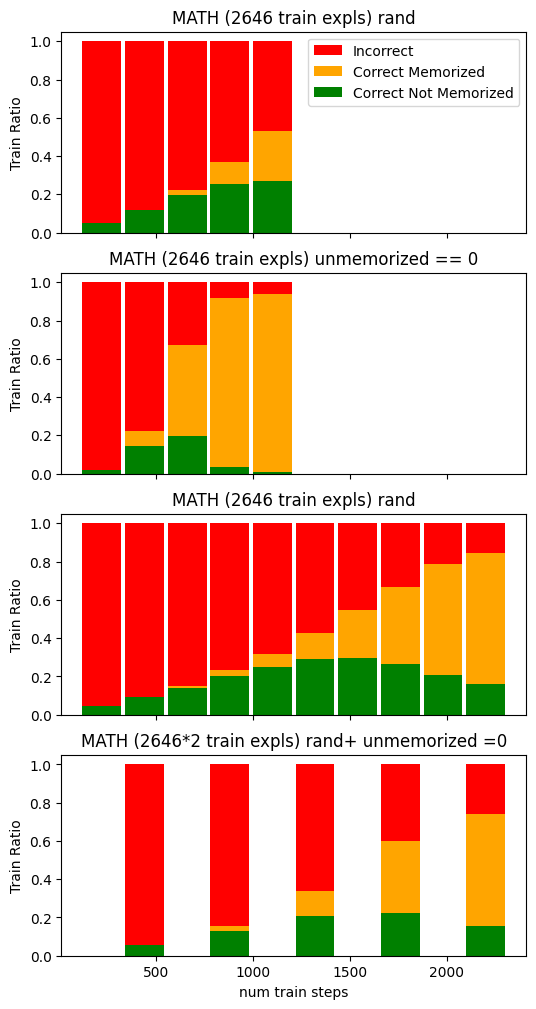

In [64]:
bar_width = 200

num_ckpts = len(ckpts10)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(6, 12), sharex=True, sharey=True)
ax1.bar(ckpts10, [1 for i in range(num_ckpts)], color = "red", label = "Incorrect", width=bar_width)
ax1.bar(ckpts10, [1-(num_incorrect_all/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "orange", label = "Correct Memorized", width=bar_width)
ax1.bar(ckpts10, [1-(num_incorrect_all/5).mean(axis=1)[i]-(num_memorized_all/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "green", label = "Correct Not Memorized", width=bar_width)
# ax1.set_xticks([2*i for i in range(1, num_ckpts+1)])
ax1.set_ylabel("Train Ratio")
ax1.set_title("MATH (2646 train expls) rand")
ax1.legend()

ax2.bar(ckpts10, [1 for i in range(num_ckpts)], color = "red", label = "Incorrect", width=bar_width)
ax2.bar(ckpts10, [1-(num_incorrect_all2/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "orange", label = "Correct Memorized", width=bar_width)
ax2.bar(ckpts10, [1-(num_incorrect_all2/5).mean(axis=1)[i]-(num_memorized_all2/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "green", label = "Correct Not Memorized", width=bar_width)

ax2.set_ylabel("Train Ratio")
ax2.set_title("MATH (2646 train expls) unmemorized == 0")


num_ckpts = len(ckpts20)
ax3.bar(ckpts20, [1 for i in range(num_ckpts)], color = "red", label = "Incorrect", width=bar_width)
ax3.bar(ckpts20, [1-(num_incorrect_all_rand20/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "orange", label = "Correct Memorized", width=bar_width)
ax3.bar(ckpts20, [1-(num_incorrect_all_rand20/5).mean(axis=1)[i]-(num_memorized_all_rand20/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "green", label = "Correct Not Memorized", width=bar_width)

ax3.set_ylabel("Train Ratio")
ax3.set_title("MATH (2646 train expls) rand")

num_ckpts = len(ckpts10_2)
ax4.bar(ckpts10_2, [1 for i in range(num_ckpts)], color = "red", label = "Incorrect", width=bar_width)
ax4.bar(ckpts10_2, [1-(num_incorrect_all_rand_unmemorized/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "orange", label = "Correct Memorized", width=bar_width)
ax4.bar(ckpts10_2, [1-(num_incorrect_all_rand_unmemorized/5).mean(axis=1)[i]-(num_memorized_all_rand_unmemorized/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "green", label = "Correct Not Memorized", width=bar_width)

ax4.set_xlabel("num train steps")
ax4.set_ylabel("Train Ratio")
ax4.set_title("MATH (2646*2 train expls) rand+ unmemorized =0")

plt.savefig("delete.jpg")



<BarContainer object of 5 artists>

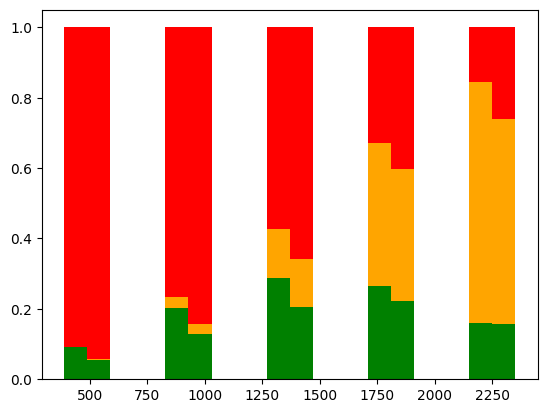

In [75]:
bar_width = 100
num_ckpts = len(ckpts20)
plt.bar(ckpts10_2, np.array([1 for i in range(num_ckpts)])[[1, 3, 5, 7, 9]], color = "red", label = "Incorrect", width=bar_width)
plt.bar(ckpts10_2, np.array([1-(num_incorrect_all_rand20/5).mean(axis=1)[i] for i in range(num_ckpts)])[[1, 3, 5, 7, 9]], color = "orange", label = "Correct Memorized", width=bar_width)
plt.bar(ckpts10_2, np.array([1-(num_incorrect_all_rand20/5).mean(axis=1)[i]-(num_memorized_all_rand20/5).mean(axis=1)[i] for i in range(num_ckpts)])[[1, 3, 5, 7, 9]], color = "green", label = "Correct Not Memorized", width=bar_width)

# ax3.set_ylabel("Train Ratio")
# ax3.set_title("MATH (2646 train expls) rand")

num_ckpts = len(ckpts10_2)
plt.bar(np.array(ckpts10_2)+100, [1 for i in range(num_ckpts)], color = "red", label = "Incorrect", width=bar_width)
plt.bar(np.array(ckpts10_2)+100, [1-(num_incorrect_all_rand_unmemorized/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "orange", label = "Correct Memorized", width=bar_width)
plt.bar(np.array(ckpts10_2)+100, [1-(num_incorrect_all_rand_unmemorized/5).mean(axis=1)[i]-(num_memorized_all_rand_unmemorized/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "green", label = "Correct Not Memorized", width=bar_width)


In [32]:
subsample_idxs_rand_unmemorized_unmemorized_subsample = []
subsample_idxs_rand_unmemorized_rand_subsample = []
for i in range(len(subsample_idxs_rand_unmemorized[:5000])):
    if subsample_idxs_rand_unmemorized[i] in subsample_idxs_0:
        subsample_idxs_rand_unmemorized_unmemorized_subsample.append(i)
    else:
        subsample_idxs_rand_unmemorized_rand_subsample.append(i)
subsample_idxs_rand_unmemorized_rand_subsample = np.array(subsample_idxs_rand_unmemorized_rand_subsample)
subsample_idxs_rand_unmemorized_unmemorized_subsample = np.array(subsample_idxs_rand_unmemorized_unmemorized_subsample)

Text(0.5, 1.0, 'unmemorized=0 (left) vs \n memorized+memorized memorized subsample (right)')

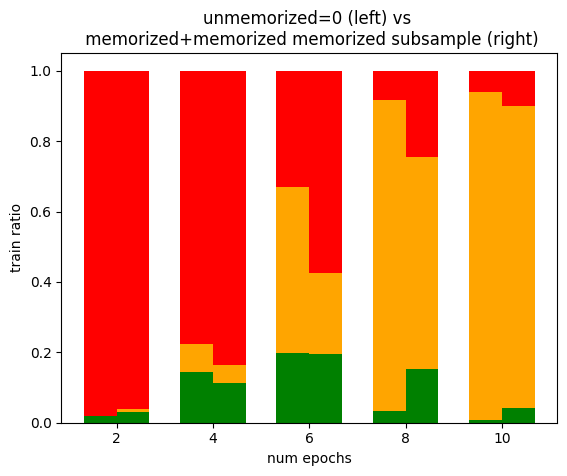

In [39]:
bar_width = 150
num_ckpts = len(ckpts10_2)
plt.bar(ckpts10_2, np.array([1 for i in range(num_ckpts)]), color = "red", label = "Incorrect", width=bar_width)
plt.bar(ckpts10_2, np.array([1-(num_incorrect_all2/5).mean(axis=1)[i] for i in range(num_ckpts)]), color = "orange", label = "Correct Memorized", width=bar_width)
plt.bar(ckpts10_2, np.array([1-(num_incorrect_all2/5).mean(axis=1)[i]-(num_memorized_all2/5).mean(axis=1)[i] for i in range(num_ckpts)]), color = "green", label = "Correct Not Memorized", width=bar_width)

# ax3.set_ylabel("Train Ratio")
# ax3.set_title("MATH (2646 train expls) rand")

num_ckpts = len(ckpts10_2)
plt.bar(np.array(ckpts10_2)+150, [1 for i in range(num_ckpts)], color = "red", label = "Incorrect", width=bar_width)
plt.bar(np.array(ckpts10_2)+150, [1-(num_incorrect_all_rand_unmemorized/5)[:, subsample_idxs_rand_unmemorized_unmemorized_subsample].mean(axis=1)[i] for i in range(num_ckpts)], color = "orange", label = "Correct Memorized", width=bar_width)
plt.bar(np.array(ckpts10_2)+150, [1-(num_incorrect_all_rand_unmemorized/5)[:, subsample_idxs_rand_unmemorized_unmemorized_subsample].mean(axis=1)[i]-(num_memorized_all_rand_unmemorized/5)[:, subsample_idxs_rand_unmemorized_unmemorized_subsample].mean(axis=1)[i] for i in range(num_ckpts)], color = "green", label = "Correct Not Memorized", width=bar_width)


plt.xticks(np.array(ckpts10_2)+75, ["2", "4", "6", "8", "10"])
plt.xlabel("num epochs")

plt.ylabel("train ratio")

plt.title("unmemorized=0 (left) vs \n memorized+memorized memorized subsample (right)")


Text(0.5, 1.0, 'rand (left) vs \n memorized+rand rand subsample (right)')

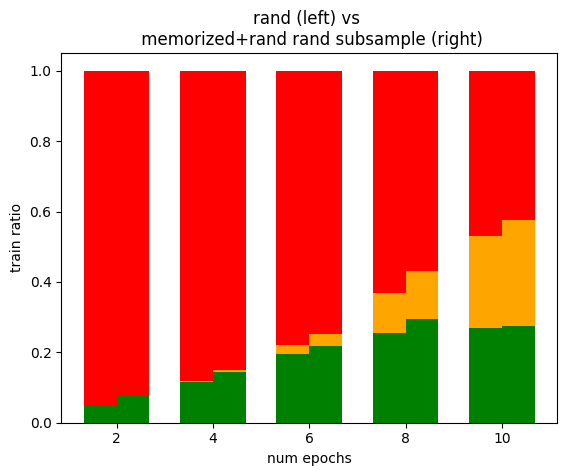

In [38]:
bar_width = 150
num_ckpts = len(ckpts10_2)
plt.bar(ckpts10_2, np.array([1 for i in range(num_ckpts)]), color = "red", label = "Incorrect", width=bar_width)
plt.bar(ckpts10_2, np.array([1-(num_incorrect_all/5).mean(axis=1)[i] for i in range(num_ckpts)]), color = "orange", label = "Correct Memorized", width=bar_width)
plt.bar(ckpts10_2, np.array([1-(num_incorrect_all/5).mean(axis=1)[i]-(num_memorized_all/5).mean(axis=1)[i] for i in range(num_ckpts)]), color = "green", label = "Correct Not Memorized", width=bar_width)

# ax3.set_ylabel("Train Ratio")
# ax3.set_title("MATH (2646 train expls) rand")

num_ckpts = len(ckpts10_2)
plt.bar(np.array(ckpts10_2)+150, [1 for i in range(num_ckpts)], color = "red", label = "Incorrect", width=bar_width)
plt.bar(np.array(ckpts10_2)+150, [1-(num_incorrect_all_rand_unmemorized/5)[:, subsample_idxs_rand_unmemorized_rand_subsample].mean(axis=1)[i] for i in range(num_ckpts)], color = "orange", label = "Correct Memorized", width=bar_width)
plt.bar(np.array(ckpts10_2)+150, [1-(num_incorrect_all_rand_unmemorized/5)[:, subsample_idxs_rand_unmemorized_rand_subsample].mean(axis=1)[i]-(num_memorized_all_rand_unmemorized/5)[:, subsample_idxs_rand_unmemorized_rand_subsample].mean(axis=1)[i] for i in range(num_ckpts)], color = "green", label = "Correct Not Memorized", width=bar_width)


plt.xticks(np.array(ckpts10_2)+75, ["2", "4", "6", "8", "10"])
plt.xlabel("num epochs")

plt.ylabel("train ratio")

plt.title("rand (left) vs \n memorized+rand rand subsample (right)")


In [34]:
(num_incorrect_all_rand_unmemorized/5)[:, subsample_idxs_rand_unmemorized_rand_subsample].mean(axis=1)

array([0.92088091, 0.85      , 0.74787928, 0.5677814 , 0.42536705])

In [36]:
(num_memorized_all_rand_unmemorized/5)[:, subsample_idxs_rand_unmemorized_unmemorized_subsample].mean(axis=1)

array([0.00596546, 0.05188383, 0.23092622, 0.60376766, 0.85698587])